##***PROJECT 4***
###1. 관심 데이터 선정🙋‍♂️
: 편견, 혐오표현, 모욕에 대한 한국어 온라인 뉴스 댓글 데이터 [Korean HateSpeech Dataset](https://github.com/kocohub/korean-hate-speech) 활용

- 총 9,381개의 댓글(훈련 7,896개/검증 417개/테스트 974개)
- 태깅 과정에 대한 [가이드라인](https://www.notion.so/c1ecb7cc52d446cc93d928d172ef8442)
- Deepest 학술그룹 세미나 [발표자료](https://www.slideshare.net/WonIkCho/2005-moon-joydeepestfinal)
    - 온라인 포털 연예 뉴스기사의 경우 두터운 독자층, 확실한 타깃, 특정 집단에 치우치지 않는 갈등 존재
    - 데이터 수집 기간 Jan.2018 - Feb. 2020

데이터셋 중에서도 🌈***Gender-related bias*** 데이터 사용
- 성별에 따른 역할이나 능력에 대한 편견
- 성별과 나이에 대한 편견
- 그 외 특정 성별, 성적 지향성, 성 정체성, 성 관련 사상을 가진 집단에 대한 편견


###2. 데이터 선정 이유🙋‍♂️
온라인에서 우리는 꽤 자주 혐오 댓글을 발견합니다. 대다수의 사람들이 그렇듯[1], 그런 댓글을 발견했을때 저는 그저 한 번 눈살을 찌푸리거나 외면해왔습니다. 하지만 유튜브, 개인방송, SNS, 게임 채팅 등 온라인 공간이 확장될수록 혐오 표현의 수위는 점점 높아지고 있습니다. 어떤 집단이든 그 대상이 될 수 있고 일반인의 경우도 예외가 아닙니다. 

[2]무차별적인 혐오 댓글은 외상 후 스트레스 장애를 남기고, 대인관계 기피나 공포로 발전하기도 한다고 합니다. 그래서 저는 이를 조금 더 적극적으로 대응하는 방법에 대해 고민해보았고, 혐오 댓글을 분류하는 모델을 만들기로 했습니다. 데이터셋은 한국어 데이터셋 위주로 조사하였고 최종적으로 Korean HateSpeech Dataset을 선택했습니다.

> [1] 국가인권위원회 '온라인 혐오표현 인식 조사(2021)'결과 온라인에서 혐오 표현을 접한 후 대처로는 '대응하지 않았다'(40.2%), '혐오표현을 하는 곳을 피하게 됐다'(33.6%) 등 대다수가 소극적으로 대처하는 것으로 조사

> [2] 해럴드경제 [악플공화국①] 일상이 돼버린 악플들…1인방송·자영업자 향한 무차별 ‘혐오공격' [기사](http://biz.heraldcorp.com/view.php?ud=20191025000180&cpv=1) 

###3. 데이터를 이용한 가설 수립🙋‍♂️
혐오 댓글 데이터에 대한 분류는 ***해당 댓글 삭제, 댓글 작성자 제재, 신고*** 등에 활용될 수 있습니다. 이는 서비스 사용자를 보호하고 기업의 댓글 서비스 개선에 도움을 줄 수 있을 것입니다. 


###4. 데이터 전처리🙋‍♂️
KoNLPy의 Mecab을 사용해서 댓글의 형태소 분석
- [KoNLPy 형태소 분석기 비교 포스팅](https://i-am-wendy.tistory.com/27)을 참고해 분석 품질이 좋고, 분석 시간이 가장 빠른 Mecab으로 선택 

> 💡 KoNLPy(코엔엘파이)는 한국어 정보처리를 위한 파이썬 패키지이다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 데이터 가져오기
dataset_train = pd.read_csv('/content/drive/MyDrive/project4/gender_bias_data/train.gender_bias.binary.csv')
dataset_dev = pd.read_csv('/content/drive/MyDrive/project4/gender_bias_data/dev.gender_bias.binary.csv')

In [18]:
print('train dataset 갯수:', len(dataset_train))
print('dev dataset 갯수:', len(dataset_dev))

train dataset 갯수: 7896
dev dataset 갯수: 471


In [21]:
dataset_train.loc[train_df['label'] == False].head(20)

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False
5,10+8 진짜 이승기랑 비교된다,False
7,10년뒤 윤서인은 분명히 재평가될것임. 말하나하나가 틀린게없음,False
8,10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐,False
9,10년차방탄팬인데 우리방탄처럼 성공은못하겠지만 일단 방탄의 부하가되고싶다는거니 이름...,False
10,10살 차이가 넘을텐데 부부라고? 무슨 내용인지 긍금하네..,False
11,12월이나 1월이더 결혼성수기지 5월은 여름이라 비수기에속한다,False


In [22]:
dataset_train.loc[train_df['label'] == True].head(20)

,comments,label
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",True
19,180이하 호빗 한남들은 결혼 하지마셈 ㅋ 돈없으면 연애도 하지마셈 ㅋ 니들 호빗 ...,True
33,"2,30대 골빈여자들은 이 기사에 다 모이는건가ㅋㅋㅋㅋ 이래서 여자는 투표권 주면 ...",True
45,20대 30대 남자 비율보소 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ할짓 드럽게없나봐.....,True
50,25년전이면 한참 팔팔할때.. 오달수도 아마 이십대 초반.. 서로 어렸을때 반콩깠던...,True
51,25년전이면오달수도 혈기왕성할때인데 그럴수도 있을듯 그리고 이제와서 25년일을 말하...,True
55,2~30대녀 :(쿵쾅쿵쾅) 꿀꿀꿀!!!!!!,True
59,2차로 남자집을 왜 가.무조건 남자만 탓 할 일은 아니다.명백히 가려지길...,True
62,30대 아줌마들 남에 집에 감놔라배놔라 ㅋㅋㅋㅋㅋ,True


In [23]:
# 중복값 확인
assert len(dataset_train) == int(dataset_train['comments'].duplicated().value_counts()) 
assert len(dataset_dev) == int(dataset_dev['comments'].duplicated().value_counts())

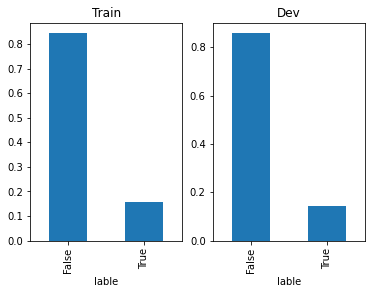

In [31]:
# 타겟 비율 확인
plt.subplot(1,2,1)  
ax = dataset_train['label'].value_counts(normalize=True).plot.bar()
plt.title('Train')
plt.xlabel('lable')

plt.subplot(1,2,2)
ax = dataset_dev['label'].value_counts(normalize=True).plot.bar()
plt.title('Dev')
plt.xlabel('lable')
plt.show()

댓글의 최소 길이 : 2
댓글의 최대 길이 : 39
댓글의 평균 길이 : 8.399316109422493


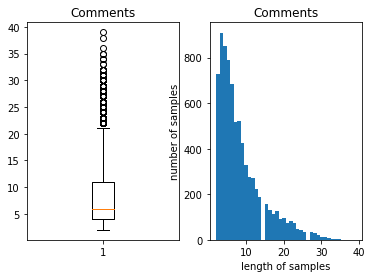

In [34]:
# 학습 데이터 길이 분포 확인
comments_len = [len(s.split()) for s in train_df['comments']]

print('댓글의 최소 길이 : {}'.format(np.min(comments_len)))
print('댓글의 최대 길이 : {}'.format(np.max(comments_len)))
print('댓글의 평균 길이 : {}'.format(np.mean(comments_len)))

plt.subplot(1,2,1)
plt.boxplot(comments_len)
plt.title('Comments')

plt.subplot(1,2,2)
plt.title('Comments')
plt.hist(comments_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
# Mecab 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-driver

In [10]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [11]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

In [12]:
import konlpy
from konlpy.tag import Mecab

mecab = Mecab()

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2139k      0 --:--:-- --:--:-- --:--:-- 4400k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [35]:
# 댓글 내 특수문자 제거
import re

def textCleaning(s):
    res = re.sub(r'[^ A-Za-z0-9가-힣]','',s)    
    return res

dataset_train['comments'] = dataset_train['comments'].apply(textCleaning)
dataset_dev['comments'] = dataset_dev['comments'].apply(textCleaning)

In [36]:
def textToMorphs(s):
    res = ' '.join(mecab.morphs(s))
    return res 

dataset_train['morphs'] = dataset_train['comments'].apply(textToMorphs)
dataset_dev['morphs'] = dataset_dev['comments'].apply(textToMorphs)

In [49]:
# label 값 0또는 1로 변경
dataset_dev["label"] = dataset_dev["label"].astype(int)
dataset_train["label"] = dataset_train["label"].astype(int)

In [50]:
dataset_train.head()

,comments,label,morphs
0,현재 호텔주인 심정 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네,0,현재 호텔 주인 심정 아 18 난 마른 하늘 에 날벼락 맞 고 호텔 망하 게 생겼 ...
1,한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요,0,한국 적 인 미인 의 대표 적 인 분 너무나 곱 고 아름다운 모습 그 모습 뒤 의 ...
2,못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...,0,못 된 넘 들 남 의 고통 을 즐겼 던 넘 들 이젠 마땅 한 처벌 을 받 아야지 그...
3,12화 어설펐는데 34화 지나서부터는 갈수록 너무 재밌던데,0,12 화 어설펐 는데 34 화 지나 서 부터 는 갈수록 너무 재밌 던데
4,1 사람 얼굴 손톱으로 긁은것은 인격살해이고2 동영상이 몰카냐 메걸리안들 생각이 없노,1,1 사람 얼굴 손톱 으로 긁 은 것 은 인격 살해 이 고 2 동영상 이 몰카 냐 메...


In [51]:
dataset_dev.head()

,comments,label,morphs
0,송중기 시대극은 믿고본다 첫회 신선하고 좋았다,0,송중기 시대극 은 믿 고 본다 첫 회 신선 하 고 좋 았 다
1,지현우 나쁜놈,0,지현우 나쁜 놈
2,알바쓰고많이만들면되지 돈욕심없으면골목식당왜나온겨 기댕기게나하고 산에가서팔어라,0,알 바 쓰 고 많이 만들 면 되 지 돈 욕심 없 으면 골목 식당 왜 나 온겨 기 댕...
3,설마 현정 작가 아니지,1,설마 현정 작가 아니 지
4,이미자씨 송혜교씨 돈이 그리 많으면 탈세말고 그돈으로 평소에 불우이웃에게 기부도 좀...,0,이미자 씨 송혜교 씨 돈 이 그리 많 으면 탈세 말 고 그 돈 으로 평소 에 불우 ...


###4. ❕딥러닝 방식 적용
KoBERT를 사용한 모델 생성
- [naver_review_classifications_pytorch_kobert](https://colab.research.google.com/github/SKTBrain/KoBERT/blob/master/scripts/NSMC/naver_review_classifications_pytorch_kobert.ipynb#scrollTo=itIExnuLbSap) 코드 참고

> 💡 [KoBERT](https://github.com/SKTBrain/KoBERT)는 BERT base multilingual cased의 한국어 성능 한계를 해결하기 위해 만들어진 모델이다.

> 💡 BERT는 2018년 구글에서 발표된 기계번역 모델이다. 이는 약 33억개의 단어로 pre-training 되어 있으며 사용 목적에 따라 fine-tuming이 가능하다는 특징이 있다.

In [39]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-14kmgbcd
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-14kmgbcd
     |████████████████████████████████| 131 kB 5.2 MB/s 
     |████████████████████████████████| 344 kB 41.3 MB/s 
     |████████████████████████████████| 47.3 MB 54.2 MB/s 
     |████████████████████████████████| 3.6 MB 39.0 MB/s 
     |████████████████████████████████| 1.2 MB 39.4 MB/s 
     |████████████████████████████████| 3.4 MB 36.7 MB/s 
     |████████████████████████████████| 895 kB 41.4 MB/s 
     |████████████████████████████████| 596 kB 48.4 MB/s 
     |████████████████████████████████| 61 kB 531 kB/s 
     |████████████████████████████████| 3.3 MB 32.7 MB/s 
     |████████████████████████████████| 8.5 MB 35.8 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 127 kB 46.7 MB/s 
  Created wheel for kobert: filename=ko

In [41]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm.notebook import tqdm

In [42]:
from kobert import get_tokenizer
from kobert import get_pytorch_kobert_model

In [43]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [45]:
device = torch.device("cuda:0")

In [44]:
#BERT 및 Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [46]:
!wget -O .cache/ratings_train.txt http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
!wget -O .cache/ratings_test.txt http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt

--2022-01-10 22:16:47--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.146.95
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.146.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘.cache/ratings_train.txt’

.cache/ratings_trai 100%[===================>]  13.95M  8.02MB/s    in 1.7s    

2022-01-10 22:16:49 (8.02 MB/s) - ‘.cache/ratings_train.txt’ saved [14628807/14628807]

--2022-01-10 22:16:49--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.146.95
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.146.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (

In [60]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [57]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [58]:
## Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [54]:
def makeDatalist(df):
    data_list = []
    for comment, label in zip(df['morphs'], df['label']):
        temp = []
        temp.append(comment)
        temp.append(label)
        data_list.append(temp)
    return data_list

train_list = makeDatalist(dataset_train)
dev_list = makeDatalist(dataset_dev)

In [55]:
train_list

[['현재 호텔 주인 심정 아 18 난 마른 하늘 에 날벼락 맞 고 호텔 망하 게 생겼 는데 누군 계속 추모 받 네', 0],
 ['한국 적 인 미인 의 대표 적 인 분 너무나 곱 고 아름다운 모습 그 모습 뒤 의 슬픔 을 미처 알 지 못했 네요', 0],
 ['못 된 넘 들 남 의 고통 을 즐겼 던 넘 들 이젠 마땅 한 처벌 을 받 아야지 그래야 공정 한 사회 지심 은 대 로 거두 거라',
  0],
 ['12 화 어설펐 는데 34 화 지나 서 부터 는 갈수록 너무 재밌 던데', 0],
 ['1 사람 얼굴 손톱 으로 긁 은 것 은 인격 살해 이 고 2 동영상 이 몰카 냐 메 걸리 안들 생각 이 없 노', 1],
 ['108 진짜 이승기 랑 비교 된다', 0],
 ['100 년 안 에 남녀 간 성 전쟁 한 번 크 게 치룬 후 일부다처제 여성 의 정치 참여 금지 여성 투표 권 삭제 가 세계 의 공통 문화 로 자리 잡 을 듯 암탉 이 너무 울 어 댐',
  1],
 ['10 년 뒤 윤서인 은 분명히 재 평가 될 것 임 말 하나하나 가 틀린 게 없 음', 0],
 ['10 년 만 에 재미 를 느끼 는 프로 였 는데 왜 니 들 때문 에 폐지 를 해야 되 냐', 0],
 ['10 년 차방 탄 팬 인데 우리 방탄 처럼 성공 은 못 하 겠 지만 일단 방탄 의 부하 가 되 고 싶 다는 거 니 이름 기억 은 해 둠',
  0],
 ['10 살 차이 가 넘 을 텐데 부부 라고 무슨 내용 인지 긍금하네', 0],
 ['12 월 이나 1 월 이 더 결혼 성수기 지 5 월 은 여름 이 라 비수기 에 속한다', 0],
 ['13 살 차이 면 요즘 세상 에 놀랄 일 도 아니 네요', 0],
 ['1400 억 뜯기 고 얼마나 억울 했 을꼬 뒤질 만큼 아플 만 하 지', 0],
 ['15 년 생 인 울 아들 은 유모차 안 타 는데', 0],
 ['15 살 차이 면 어릴 때 사고 쳤으면 딸 벌 인데 능력 좋 네 전현무 여자 들 이 전현무 스타일 이 좋 은가 봐', 0],
 ['166 에 57

In [61]:
data_train = BERTDataset(train_list, 0, 1, tok, max_len, True, False)
data_dev = BERTDataset(dev_list, 0, 1, tok, max_len, True, False)

In [67]:
# 토큰화 확인
data_train[0]

(array([   2, 5064, 5095, 4213, 7119, 3060, 7227, 3093,  547, 1406, 1907,
        6115,  517, 7796,  517, 6896, 1407, 6353, 6015, 1970,  993, 5095,
        1968, 7782,  921, 2704, 5422,  517, 5761, 1526, 5512,  984, 4541,
        6213, 2220, 1469,    3,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(37, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [69]:
# torch 형식의 dataset 생성
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_dev, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [63]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [64]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [70]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [71]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [72]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [73]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [74]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [75]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_dataloader), total=len(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 0.848010778427124 train acc 0.359375
epoch 1 train acc 0.8258988575268816


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 1 test acc 0.9281589673913043


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.3292650282382965 train acc 0.859375
epoch 2 train acc 0.8958333333333333


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 2 test acc 0.9296875


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.2879433333873749 train acc 0.90625
epoch 3 train acc 0.9251932123655914


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 3 test acc 0.8754245923913043


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.2410307079553604 train acc 0.921875
epoch 4 train acc 0.9484627016129032


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 4 test acc 0.947265625


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.12922760844230652 train acc 0.953125
epoch 5 train acc 0.9668598790322581


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 5 test acc 0.943359375
